In [1]:
using Interact, Plots, DifferentialEquations, BifurcationKit, Setfield, Polynomials

WebIO._IJuliaInit()

# Ecuacion del consumidor

Una ecuacion que aparece en la macroeconomia es un modelo super simplificado de consumo de un recurso renovable conocida como ecuacion del consumidor que no es mas que la ecuacion logistica con un termino de cosecha o consumo que es directamente proporcional a la abundancia del recurso $px$. Si bien es una ecuacion mas simple que la anterior presenta otra bifurcacion que no es de nodo silla

$ \dot{x} = Rx\left(1-\frac{x}{K}\right) - Px$ 

En este caso los puntos fijos son siempre dos. Uno esta siempre en $x=0$ pero cambia de estabilidad cuando $P=R$ y el otro esta en:

$x_* = \frac{K(R-P)}{R}$

Notar que como no hay problema de divergencia para $x>0$ ya no necesitamos el callback.

In [5]:
# Ecuacion del consumidor
consumer(x,p,t)=p[1]*x*(1.0-x/p[2])-p[3]*x

consumer (generic function with 1 method)

In [6]:
@manipulate throttle=.05 for R=0:0.02:2.0,K=0.01:0.01:2.0,P=0:0.02:0.5,xini=0:0.02:2.0,tmax=1.0:5:50
    prob = ODEProblem(consumer, xini, (0,tmax), [R,K,P])
    sol = solve(prob)
    p1 = plot(0:0.02:2.0,consumer.(0:0.02:2.0,([R,K,P],),0.0),label="f(x)")
    plot!(p1,sol.u,sol.u*0,label="x")
    scatter!(p1,[prob.u0],[0],label="xini")
    p2 = plot(sol,ylim=(0,2.0))
    plot(p1,p2,layout=(1,2),size = (900,300))
end

Node{WebIO.DOM}(WebIO.DOM(:html, :div), Any[Node{WebIO.DOM}(WebIO.DOM(:html, :div), Any[Scope(Node{WebIO.DOM}(WebIO.DOM(:html, :div), Any[Node{WebIO.DOM}(WebIO.DOM(:html, :div), Any[Node{WebIO.DOM}(WebIO.DOM(:html, :label), Any["R"], Dict{Symbol, Any}(:className => "interact ", :style => Dict{Any, Any}(:padding => "5px 10px 0px 10px")))], Dict{Symbol, Any}(:className => "interact-flex-row-left")), Node{WebIO.DOM}(WebIO.DOM(:html, :div), Any[Node{WebIO.DOM}(WebIO.DOM(:html, :input), Any[], Dict{Symbol, Any}(:max => 101, :min => 1, :attributes => Dict{Any, Any}(:type => "range", Symbol("data-bind") => "numericValue: index, valueUpdate: 'input', event: {change: function (){this.changes(this.changes()+1)}}", "orient" => "horizontal"), :step => 1, :className => "slider slider is-fullwidth", :style => Dict{Any, Any}()))], Dict{Symbol, Any}(:className => "interact-flex-row-center")), Node{WebIO.DOM}(WebIO.DOM(:html, :div), Any[Node{WebIO.DOM}(WebIO.DOM(:html, :p), Any[], Dict{Symbol, Any}(:attributes => Dict("data-bind" => "text: formatted_val")))], Dict{Symbol, Any}(:className => "interact-flex-row-right"))], Dict{Symbol, Any}(:className => "interact-flex-row interact-widget")), Dict{String, Tuple{Observables.AbstractObservable, Union{Nothing, Bool}}}("changes" => (Observable{Int64} with 1 listeners. Value:
0, nothing), "index" => (Observable{Any} with 2 listeners. Value:
51, nothing)), Set{String}(), nothing, Asset[Asset("js", "knockout", "C:\\Users\\Camilo\\.julia\\packages\\Knockout\\3gjS1\\src\\..\\assets\\knockout.js"), Asset("js", "knockout_punches", "C:\\Users\\Camilo\\.julia\\packages\\Knockout\\3gjS1\\src\\..\\assets\\knockout_punches.js"), Asset("js", nothing, "C:\\Users\\Camilo\\.julia\\packages\\InteractBase\\o1I6G\\src\\..\\assets\\all.js"), Asset("css", nothing, "C:\\Users\\Camilo\\.julia\\packages\\InteractBase\\o1I6G\\src\\..\\assets\\style.css"), Asset("css", nothing, "C:\\Users\\Camilo\\.julia\\packages\\Interact\\pVyN2\\src\\..\\assets\\bulma_confined.min.css")], Dict{Any, Any}("changes" => Any[WebIO.JSString("(function (val){return (val!=this.model[\"changes\"]()) ? (this.valueFromJulia[\"changes\"]=true, this.model[\"changes\"](val)) : undefined})")], "index" => Any[WebIO.JSString("(function (val){return (val!=this.model[\"index\"]()) ? (this.valueFromJulia[\"index\"]=true, this.model[\"index\"](val)) : undefined})")]), WebIO.ConnectionPool(Channel{Any}(32), Set{AbstractConnection}(), Condition(Base.InvasiveLinkedList{Task}(Task (runnable) @0x000000008e649140, Task (runnable) @0x000000008e649140), Base.AlwaysLockedST(1))), WebIO.JSString[WebIO.JSString("function () {\n    var handler = (function (ko, koPunches) {\n    ko.punches.enableAll();\n    ko.bindingHandlers.numericValue = {\n        init: function(element, valueAccessor, allBindings, data, context) {\n            var stringified = ko.observable(ko.unwrap(valueAccessor()));\n            stringified.subscribe(function(value) {\n                var val = parseFloat(value);\n                if (!isNaN(val)) {\n                    valueAccessor()(val);\n                }\n            });\n            valueAccessor().subscribe(function(value) {\n                var str = JSON.stringify(value);\n                if ((str == \"0\") && ([\"-0\", \"-0.\"].indexOf(stringified()) >= 0))\n                     return;\n                 if ([\"null\", \"\"].indexOf(str) >= 0)\n                     return;\n                stringified(str);\n            });\n            ko.applyBindingsToNode(\n                element,\n                {\n                    value: stringified,\n                    valueUpdate: allBindings.get('valueUpdate'),\n                },\n                context,\n            );\n        }\n    };\n    var json_data = {\"formatted_vals\":[\"0.0\",\"0.02\",\"0.04\",\"0.06\",\"0.08\",\"0.1\",\"0.12\",\"0.14\",\"0.16\",\"0.18\",\"0.2\",\"0.22\",\"0.24\",\"0.26\",\"0.28\",\"0.3\",\"0.32\",\"0.34\",\"0.36\",\"0.38\",\"0.4\",\"0.42\",\"0.44\",\"0.46\",

## Diagrama de Bifurcaciones Consumidor. Bifurcacion Transcritica

En este caso lo que sucede es que a medida que $P$ se incrementa el punto fijo estable en $x_*=K(R-P)/R$ se aproxima a cero, pero no colapsa con el punto fijo en $x_*=0$ sino que pasa del lado de los negativos e intercambia estabilidad. El punto fijo en $x_*=0$ ahora es estable para $P>R$

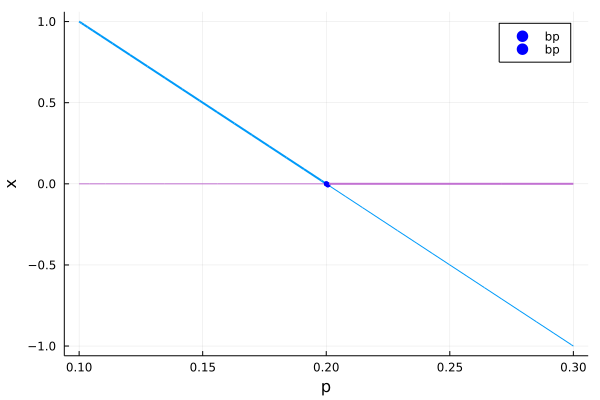

In [7]:
F=(x,p) -> @. consumer(x,(p,),0)
opts = ContinuationPar(pMin=0.1,pMax=0.3, ds = 0.003, dsmax = 0.05, detectBifurcation=3)
br1, = continuation(F,[0.8],[0.2,2.0,0.1],(@lens _[3]), opts; recordFromSolution = (x, p) -> x[1])
br2, = continuation(F,[0.0],[0.2,2.0,0.1],(@lens _[3]), opts)
plot(br1)
plot!(br2)

## Potencial de Ecuacion del Consumidor

Al potencial de la logistica se le agrega ahora un término cuadratico $Px^2$ que hace que el potencial tenga siempre una barrera a la izquierda y un pozo a la derecha, solo que en la bifurcacion ambos se encuentran

$V(x) = \frac{Rx^2}{3K}\left(x- \frac{3K}{2}\right) + Px^2$

In [26]:
Vconsumer(x,p) = p[1]*x*x/(3*p[2])*(x-3*p[2]/2)+p[3]*x*x/2
R = 0.2; K=2.0
@manipulate throttle=.05 for P=0.15:0.001:0.25,xini=0:0.01:0.6, tmax=10:10:200
    xmax = max(1.2*xini,0.3)
    x=-0.3:0.01:xmax
    p1 = plot(x,Vconsumer.(x,([R,K,P],)),size = (900,300))
    sol = solve(ODEProblem(consumer, xini, (0,tmax), [R,K,P]))
    scatter!(p1,[xini],[Vconsumer(xini,[R,K,P])],label="xini")
    plot!(p1,sol,Vconsumer.(sol.u,([R,K,P],)),color=:black,linewidth=2)
end

Node{WebIO.DOM}(WebIO.DOM(:html, :div), Any[Node{WebIO.DOM}(WebIO.DOM(:html, :div), Any[Scope(Node{WebIO.DOM}(WebIO.DOM(:html, :div), Any[Node{WebIO.DOM}(WebIO.DOM(:html, :div), Any[Node{WebIO.DOM}(WebIO.DOM(:html, :label), Any["P"], Dict{Symbol, Any}(:className => "interact ", :style => Dict{Any, Any}(:padding => "5px 10px 0px 10px")))], Dict{Symbol, Any}(:className => "interact-flex-row-left")), Node{WebIO.DOM}(WebIO.DOM(:html, :div), Any[Node{WebIO.DOM}(WebIO.DOM(:html, :input), Any[], Dict{Symbol, Any}(:max => 101, :min => 1, :attributes => Dict{Any, Any}(:type => "range", Symbol("data-bind") => "numericValue: index, valueUpdate: 'input', event: {change: function (){this.changes(this.changes()+1)}}", "orient" => "horizontal"), :step => 1, :className => "slider slider is-fullwidth", :style => Dict{Any, Any}()))], Dict{Symbol, Any}(:className => "interact-flex-row-center")), Node{WebIO.DOM}(WebIO.DOM(:html, :div), Any[Node{WebIO.DOM}(WebIO.DOM(:html, :p), Any[], Dict{Symbol, Any}(:attributes => Dict("data-bind" => "text: formatted_val")))], Dict{Symbol, Any}(:className => "interact-flex-row-right"))], Dict{Symbol, Any}(:className => "interact-flex-row interact-widget")), Dict{String, Tuple{Observables.AbstractObservable, Union{Nothing, Bool}}}("changes" => (Observable{Int64} with 1 listeners. Value:
0, nothing), "index" => (Observable{Any} with 2 listeners. Value:
51, nothing)), Set{String}(), nothing, Asset[Asset("js", "knockout", "C:\\Users\\Camilo\\.julia\\packages\\Knockout\\3gjS1\\src\\..\\assets\\knockout.js"), Asset("js", "knockout_punches", "C:\\Users\\Camilo\\.julia\\packages\\Knockout\\3gjS1\\src\\..\\assets\\knockout_punches.js"), Asset("js", nothing, "C:\\Users\\Camilo\\.julia\\packages\\InteractBase\\o1I6G\\src\\..\\assets\\all.js"), Asset("css", nothing, "C:\\Users\\Camilo\\.julia\\packages\\InteractBase\\o1I6G\\src\\..\\assets\\style.css"), Asset("css", nothing, "C:\\Users\\Camilo\\.julia\\packages\\Interact\\pVyN2\\src\\..\\assets\\bulma_confined.min.css")], Dict{Any, Any}("changes" => Any[WebIO.JSString("(function (val){return (val!=this.model[\"changes\"]()) ? (this.valueFromJulia[\"changes\"]=true, this.model[\"changes\"](val)) : undefined})")], "index" => Any[WebIO.JSString("(function (val){return (val!=this.model[\"index\"]()) ? (this.valueFromJulia[\"index\"]=true, this.model[\"index\"](val)) : undefined})")]), WebIO.ConnectionPool(Channel{Any}(32), Set{AbstractConnection}(), Condition(Base.InvasiveLinkedList{Task}(Task (runnable) @0x00000000916c2a40, Task (runnable) @0x00000000916c2a40), Base.AlwaysLockedST(1))), WebIO.JSString[WebIO.JSString("function () {\n    var handler = (function (ko, koPunches) {\n    ko.punches.enableAll();\n    ko.bindingHandlers.numericValue = {\n        init: function(element, valueAccessor, allBindings, data, context) {\n            var stringified = ko.observable(ko.unwrap(valueAccessor()));\n            stringified.subscribe(function(value) {\n                var val = parseFloat(value);\n                if (!isNaN(val)) {\n                    valueAccessor()(val);\n                }\n            });\n            valueAccessor().subscribe(function(value) {\n                var str = JSON.stringify(value);\n                if ((str == \"0\") && ([\"-0\", \"-0.\"].indexOf(stringified()) >= 0))\n                     return;\n                 if ([\"null\", \"\"].indexOf(str) >= 0)\n                     return;\n                stringified(str);\n            });\n            ko.applyBindingsToNode(\n                element,\n                {\n                    value: stringified,\n                    valueUpdate: allBindings.get('valueUpdate'),\n                },\n                context,\n            );\n        }\n    };\n    var json_data = {\"formatted_vals\":[\"0.15\",\"0.151\",\"0.152\",\"0.153\",\"0.154\",\"0.155\",\"0.156\",\"0.157\",\"0.158\",\"0.159\",\"0.16\",\"0.161\",\"0.162\",\"0.163\",\"0.164\",\"0.165\",\"0.166\",\"0.167\",\"0.168\",\"0.169\",\"0.17\",\"0.

# Ecuacion Logistica con Harvest mas realista

Ahora el Harvest no es constante sino que depende de la poblacion 

$ \dot{x} = Rx\left(1-\frac{x}{K}\right) - Hx\frac{1}{1+x}$ 

Este sistema va a tener siempre un punto fijo en $x=0$ y puede tener otros dos como solucion de la ecuacion cuadratica:

$x^2-(K-1)x+KH/R-K=0$

Estos puntos fijos van a ser uno estable y otro inestable (se originan en una bifurcacion SN) pero solo van a estar en el eje positivo cuando $K>1$. Notar que como no hay problema de divergencia para $x>0$ ya no necesitamos el callback.

In [45]:
# Ecuacion Logistica con harvest realista
logharvest2(x,p,t)=p[1]*x*(1.0-x/p[2])-p[3]*x/(1+x)

logharvest2 (generic function with 1 method)

In [46]:
@manipulate throttle=.05 for R=0:0.02:2.0,K=0:0.01:2.0,H=0:0.02:0.25,xini=0:0.02:2.0,tmax=1.0:5:50
    prob = ODEProblem(logharvest2, xini, (0,tmax), [R,K,H])
    sol = solve(prob)
    p1 = plot(-0.2:0.02:1.0,logharvest2.(-0.2:0.02:1.0,([R,K,H],),0.0),label="f(x)")
    plot!(p1,sol.u,sol.u*0,label="x")
    scatter!(p1,[prob.u0],[0],label="xini")
    p2 = plot(sol,ylim=(0,2.0))
    plot(p1,p2,layout=(1,2),size = (900,300))
end

Node{WebIO.DOM}(WebIO.DOM(:html, :div), Any[Node{WebIO.DOM}(WebIO.DOM(:html, :div), Any[Scope(Node{WebIO.DOM}(WebIO.DOM(:html, :div), Any[Node{WebIO.DOM}(WebIO.DOM(:html, :div), Any[Node{WebIO.DOM}(WebIO.DOM(:html, :label), Any["R"], Dict{Symbol, Any}(:className => "interact ", :style => Dict{Any, Any}(:padding => "5px 10px 0px 10px")))], Dict{Symbol, Any}(:className => "interact-flex-row-left")), Node{WebIO.DOM}(WebIO.DOM(:html, :div), Any[Node{WebIO.DOM}(WebIO.DOM(:html, :input), Any[], Dict{Symbol, Any}(:max => 101, :min => 1, :attributes => Dict{Any, Any}(:type => "range", Symbol("data-bind") => "numericValue: index, valueUpdate: 'input', event: {change: function (){this.changes(this.changes()+1)}}", "orient" => "horizontal"), :step => 1, :className => "slider slider is-fullwidth", :style => Dict{Any, Any}()))], Dict{Symbol, Any}(:className => "interact-flex-row-center")), Node{WebIO.DOM}(WebIO.DOM(:html, :div), Any[Node{WebIO.DOM}(WebIO.DOM(:html, :p), Any[], Dict{Symbol, Any}(:attributes => Dict("data-bind" => "text: formatted_val")))], Dict{Symbol, Any}(:className => "interact-flex-row-right"))], Dict{Symbol, Any}(:className => "interact-flex-row interact-widget")), Dict{String, Tuple{Observables.AbstractObservable, Union{Nothing, Bool}}}("changes" => (Observable{Int64} with 1 listeners. Value:
0, nothing), "index" => (Observable{Any} with 2 listeners. Value:
51, nothing)), Set{String}(), nothing, Asset[Asset("js", "knockout", "C:\\Users\\Camilo\\.julia\\packages\\Knockout\\3gjS1\\src\\..\\assets\\knockout.js"), Asset("js", "knockout_punches", "C:\\Users\\Camilo\\.julia\\packages\\Knockout\\3gjS1\\src\\..\\assets\\knockout_punches.js"), Asset("js", nothing, "C:\\Users\\Camilo\\.julia\\packages\\InteractBase\\o1I6G\\src\\..\\assets\\all.js"), Asset("css", nothing, "C:\\Users\\Camilo\\.julia\\packages\\InteractBase\\o1I6G\\src\\..\\assets\\style.css"), Asset("css", nothing, "C:\\Users\\Camilo\\.julia\\packages\\Interact\\pVyN2\\src\\..\\assets\\bulma_confined.min.css")], Dict{Any, Any}("changes" => Any[WebIO.JSString("(function (val){return (val!=this.model[\"changes\"]()) ? (this.valueFromJulia[\"changes\"]=true, this.model[\"changes\"](val)) : undefined})")], "index" => Any[WebIO.JSString("(function (val){return (val!=this.model[\"index\"]()) ? (this.valueFromJulia[\"index\"]=true, this.model[\"index\"](val)) : undefined})")]), WebIO.ConnectionPool(Channel{Any}(32), Set{AbstractConnection}(), Condition(Base.InvasiveLinkedList{Task}(Task (runnable) @0x000000007708bb70, Task (runnable) @0x000000007708bb70), Base.AlwaysLockedST(1))), WebIO.JSString[WebIO.JSString("function () {\n    var handler = (function (ko, koPunches) {\n    ko.punches.enableAll();\n    ko.bindingHandlers.numericValue = {\n        init: function(element, valueAccessor, allBindings, data, context) {\n            var stringified = ko.observable(ko.unwrap(valueAccessor()));\n            stringified.subscribe(function(value) {\n                var val = parseFloat(value);\n                if (!isNaN(val)) {\n                    valueAccessor()(val);\n                }\n            });\n            valueAccessor().subscribe(function(value) {\n                var str = JSON.stringify(value);\n                if ((str == \"0\") && ([\"-0\", \"-0.\"].indexOf(stringified()) >= 0))\n                     return;\n                 if ([\"null\", \"\"].indexOf(str) >= 0)\n                     return;\n                stringified(str);\n            });\n            ko.applyBindingsToNode(\n                element,\n                {\n                    value: stringified,\n                    valueUpdate: allBindings.get('valueUpdate'),\n                },\n                context,\n            );\n        }\n    };\n    var json_data = {\"formatted_vals\":[\"0.0\",\"0.02\",\"0.04\",\"0.06\",\"0.08\",\"0.1\",\"0.12\",\"0.14\",\"0.16\",\"0.18\",\"0.2\",\"0.22\",\"0.24\",\"0.26\",\"0.28\",\"0.3\",\"0.32\",\"0.34\",\"0.36\",\"0.38\",\"0.4\",\"0.42\",\"0.44\",\"0.46\",

## Diagrama de bifurcaciones Logistica con Harvest Realista. Nodo Silla + Transcritica

En este caso tambien tenemos una bifurcacion de nodo silla pero en los dos puntos fijos que no son cero.

Estos puntos fijos pueden calcularse a partir de la ecuacion cuadratica como 

$x_* = \frac{K-1}{2} \pm \sqrt{\left(\frac{K-1}{2}\right)^2-\frac{KH}{R}+K}$

y van a colapsar cuando la raiz cuadrada sea cero es decir cuando 

$H = \frac{R}{K}\left(\frac{K-1}{2}\right)^2 + R$

La bifurcacion se produce para ese valor de $H$ y en la coordenada $x=(K-1)/2$

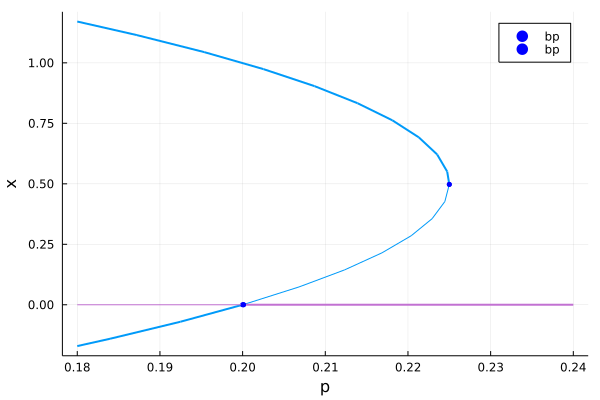

In [47]:
F=(x,p) -> @. logharvest2(x,(p,),0)
opts = ContinuationPar(pMin=0.18,pMax=0.24, ds = 0.04, dsmax = 0.05,detectBifurcation=3)
br1, = continuation(F,[1.0],[0.2,2.0,0.18],(@lens _[3]), opts; recordFromSolution = (x, p) -> x[1])
br2, = continuation(F,[0.1],[0.2,2.0,0.18],(@lens _[3]), opts)
plot(br1)
plot!(br2)

In [48]:
Vlogharvest2(x,p) = p[1]*x*x/(3*p[2])*(x-3*p[2]/2)+p[3]*(x-log(1+x))
R = 0.2; K=2.0
@manipulate throttle=.05 for H=0.18:0.001:0.24,xini=0:0.01:1.2, tmax=10:10:200
    x=-0.3:0.01:1.2
    p1 = plot(x,Vlogharvest2.(x,([R,K,H],)),size = (900,300))
    sol = solve(ODEProblem(logharvest2, xini, (0,tmax), [R,K,H]))
    scatter!(p1,[xini],[Vlogharvest2(xini,[R,K,H])],label="xini")
    plot!(p1,sol,Vlogharvest2.(sol.u,([R,K,H],)),color=:black,linewidth=2)
end

Node{WebIO.DOM}(WebIO.DOM(:html, :div), Any[Node{WebIO.DOM}(WebIO.DOM(:html, :div), Any[Scope(Node{WebIO.DOM}(WebIO.DOM(:html, :div), Any[Node{WebIO.DOM}(WebIO.DOM(:html, :div), Any[Node{WebIO.DOM}(WebIO.DOM(:html, :label), Any["H"], Dict{Symbol, Any}(:className => "interact ", :style => Dict{Any, Any}(:padding => "5px 10px 0px 10px")))], Dict{Symbol, Any}(:className => "interact-flex-row-left")), Node{WebIO.DOM}(WebIO.DOM(:html, :div), Any[Node{WebIO.DOM}(WebIO.DOM(:html, :input), Any[], Dict{Symbol, Any}(:max => 61, :min => 1, :attributes => Dict{Any, Any}(:type => "range", Symbol("data-bind") => "numericValue: index, valueUpdate: 'input', event: {change: function (){this.changes(this.changes()+1)}}", "orient" => "horizontal"), :step => 1, :className => "slider slider is-fullwidth", :style => Dict{Any, Any}()))], Dict{Symbol, Any}(:className => "interact-flex-row-center")), Node{WebIO.DOM}(WebIO.DOM(:html, :div), Any[Node{WebIO.DOM}(WebIO.DOM(:html, :p), Any[], Dict{Symbol, Any}(:attributes => Dict("data-bind" => "text: formatted_val")))], Dict{Symbol, Any}(:className => "interact-flex-row-right"))], Dict{Symbol, Any}(:className => "interact-flex-row interact-widget")), Dict{String, Tuple{Observables.AbstractObservable, Union{Nothing, Bool}}}("changes" => (Observable{Int64} with 1 listeners. Value:
0, nothing), "index" => (Observable{Any} with 2 listeners. Value:
31, nothing)), Set{String}(), nothing, Asset[Asset("js", "knockout", "C:\\Users\\Camilo\\.julia\\packages\\Knockout\\3gjS1\\src\\..\\assets\\knockout.js"), Asset("js", "knockout_punches", "C:\\Users\\Camilo\\.julia\\packages\\Knockout\\3gjS1\\src\\..\\assets\\knockout_punches.js"), Asset("js", nothing, "C:\\Users\\Camilo\\.julia\\packages\\InteractBase\\o1I6G\\src\\..\\assets\\all.js"), Asset("css", nothing, "C:\\Users\\Camilo\\.julia\\packages\\InteractBase\\o1I6G\\src\\..\\assets\\style.css"), Asset("css", nothing, "C:\\Users\\Camilo\\.julia\\packages\\Interact\\pVyN2\\src\\..\\assets\\bulma_confined.min.css")], Dict{Any, Any}("changes" => Any[WebIO.JSString("(function (val){return (val!=this.model[\"changes\"]()) ? (this.valueFromJulia[\"changes\"]=true, this.model[\"changes\"](val)) : undefined})")], "index" => Any[WebIO.JSString("(function (val){return (val!=this.model[\"index\"]()) ? (this.valueFromJulia[\"index\"]=true, this.model[\"index\"](val)) : undefined})")]), WebIO.ConnectionPool(Channel{Any}(32), Set{AbstractConnection}(), Condition(Base.InvasiveLinkedList{Task}(Task (runnable) @0x000000005fec5780, Task (runnable) @0x000000005fec5780), Base.AlwaysLockedST(1))), WebIO.JSString[WebIO.JSString("function () {\n    var handler = (function (ko, koPunches) {\n    ko.punches.enableAll();\n    ko.bindingHandlers.numericValue = {\n        init: function(element, valueAccessor, allBindings, data, context) {\n            var stringified = ko.observable(ko.unwrap(valueAccessor()));\n            stringified.subscribe(function(value) {\n                var val = parseFloat(value);\n                if (!isNaN(val)) {\n                    valueAccessor()(val);\n                }\n            });\n            valueAccessor().subscribe(function(value) {\n                var str = JSON.stringify(value);\n                if ((str == \"0\") && ([\"-0\", \"-0.\"].indexOf(stringified()) >= 0))\n                     return;\n                 if ([\"null\", \"\"].indexOf(str) >= 0)\n                     return;\n                stringified(str);\n            });\n            ko.applyBindingsToNode(\n                element,\n                {\n                    value: stringified,\n                    valueUpdate: allBindings.get('valueUpdate'),\n                },\n                context,\n            );\n        }\n    };\n    var json_data = {\"formatted_vals\":[\"0.18\",\"0.181\",\"0.182\",\"0.183\",\"0.184\",\"0.185\",\"0.186\",\"0.187\",\"0.188\",\"0.189\",\"0.19\",\"0.191\",\"0.192\",\"0.193\",\"0.194\",\"0.195\",\"0.196\",\"0.197\",\"0.198\",\"0.199\",\"0.2\",\"0.20

# Ecuacion Logistica con OutBreak

Se agrega a la ecuacion logistica un termino con la funcion del predador

$\dot{x} = Rx(1-x/K)-P\frac{x^2}{1+x^2}$

En este caso no basta una cuadratica para calcular los puntos fijos. Pero $x=0$ sigue siendo un punto fijo repulsor. Y bajo ciertas condiciones tenemos dos puntos fijos atractores separados por un repulsor.

In [49]:
# Ecuacion Logistica con Outbreak
logoutbreak(x,p,t)=p[1]*x*(1.0-x/p[2])-p[3]*x*x/(1+x*x)

logoutbreak (generic function with 1 method)

In [50]:
@manipulate throttle=.05 for R=0:0.02:2.0,K=0:0.1:10.0,P=0:0.01:2.0,xini=0:0.05:8.0,tmax=10.0:5:100
    prob = ODEProblem(logoutbreak, xini, (0,tmax), [R,K,P])
    sol = solve(prob)
    p1 = plot(-0.2:0.1:8.0,logoutbreak.(-0.2:0.1:8.0,([R,K,P],),0.0),label="f(x)")
    plot!(p1,sol.u,sol.u*0,label="x")
    scatter!(p1,[prob.u0],[0],label="xini")
    p2 = plot(sol,ylim=(0,8.0))
    plot(p1,p2,layout=(1,2),size = (900,300))
end

Node{WebIO.DOM}(WebIO.DOM(:html, :div), Any[Node{WebIO.DOM}(WebIO.DOM(:html, :div), Any[Scope(Node{WebIO.DOM}(WebIO.DOM(:html, :div), Any[Node{WebIO.DOM}(WebIO.DOM(:html, :div), Any[Node{WebIO.DOM}(WebIO.DOM(:html, :label), Any["R"], Dict{Symbol, Any}(:className => "interact ", :style => Dict{Any, Any}(:padding => "5px 10px 0px 10px")))], Dict{Symbol, Any}(:className => "interact-flex-row-left")), Node{WebIO.DOM}(WebIO.DOM(:html, :div), Any[Node{WebIO.DOM}(WebIO.DOM(:html, :input), Any[], Dict{Symbol, Any}(:max => 101, :min => 1, :attributes => Dict{Any, Any}(:type => "range", Symbol("data-bind") => "numericValue: index, valueUpdate: 'input', event: {change: function (){this.changes(this.changes()+1)}}", "orient" => "horizontal"), :step => 1, :className => "slider slider is-fullwidth", :style => Dict{Any, Any}()))], Dict{Symbol, Any}(:className => "interact-flex-row-center")), Node{WebIO.DOM}(WebIO.DOM(:html, :div), Any[Node{WebIO.DOM}(WebIO.DOM(:html, :p), Any[], Dict{Symbol, Any}(:attributes => Dict("data-bind" => "text: formatted_val")))], Dict{Symbol, Any}(:className => "interact-flex-row-right"))], Dict{Symbol, Any}(:className => "interact-flex-row interact-widget")), Dict{String, Tuple{Observables.AbstractObservable, Union{Nothing, Bool}}}("changes" => (Observable{Int64} with 1 listeners. Value:
0, nothing), "index" => (Observable{Any} with 2 listeners. Value:
51, nothing)), Set{String}(), nothing, Asset[Asset("js", "knockout", "C:\\Users\\Camilo\\.julia\\packages\\Knockout\\3gjS1\\src\\..\\assets\\knockout.js"), Asset("js", "knockout_punches", "C:\\Users\\Camilo\\.julia\\packages\\Knockout\\3gjS1\\src\\..\\assets\\knockout_punches.js"), Asset("js", nothing, "C:\\Users\\Camilo\\.julia\\packages\\InteractBase\\o1I6G\\src\\..\\assets\\all.js"), Asset("css", nothing, "C:\\Users\\Camilo\\.julia\\packages\\InteractBase\\o1I6G\\src\\..\\assets\\style.css"), Asset("css", nothing, "C:\\Users\\Camilo\\.julia\\packages\\Interact\\pVyN2\\src\\..\\assets\\bulma_confined.min.css")], Dict{Any, Any}("changes" => Any[WebIO.JSString("(function (val){return (val!=this.model[\"changes\"]()) ? (this.valueFromJulia[\"changes\"]=true, this.model[\"changes\"](val)) : undefined})")], "index" => Any[WebIO.JSString("(function (val){return (val!=this.model[\"index\"]()) ? (this.valueFromJulia[\"index\"]=true, this.model[\"index\"](val)) : undefined})")]), WebIO.ConnectionPool(Channel{Any}(32), Set{AbstractConnection}(), Condition(Base.InvasiveLinkedList{Task}(Task (runnable) @0x0000000076bbdaa0, Task (runnable) @0x0000000076bbdaa0), Base.AlwaysLockedST(1))), WebIO.JSString[WebIO.JSString("function () {\n    var handler = (function (ko, koPunches) {\n    ko.punches.enableAll();\n    ko.bindingHandlers.numericValue = {\n        init: function(element, valueAccessor, allBindings, data, context) {\n            var stringified = ko.observable(ko.unwrap(valueAccessor()));\n            stringified.subscribe(function(value) {\n                var val = parseFloat(value);\n                if (!isNaN(val)) {\n                    valueAccessor()(val);\n                }\n            });\n            valueAccessor().subscribe(function(value) {\n                var str = JSON.stringify(value);\n                if ((str == \"0\") && ([\"-0\", \"-0.\"].indexOf(stringified()) >= 0))\n                     return;\n                 if ([\"null\", \"\"].indexOf(str) >= 0)\n                     return;\n                stringified(str);\n            });\n            ko.applyBindingsToNode(\n                element,\n                {\n                    value: stringified,\n                    valueUpdate: allBindings.get('valueUpdate'),\n                },\n                context,\n            );\n        }\n    };\n    var json_data = {\"formatted_vals\":[\"0.0\",\"0.02\",\"0.04\",\"0.06\",\"0.08\",\"0.1\",\"0.12\",\"0.14\",\"0.16\",\"0.18\",\"0.2\",\"0.22\",\"0.24\",\"0.26\",\"0.28\",\"0.3\",\"0.32\",\"0.34\",\"0.36\",\"0.38\",\"0.4\",\"0.42\",\"0.44\",\"0.46\",

## Diagrama de bifurcaciones Logistica con Outbreak. Doble Nodo Silla

En este caso tenemos dos bifurcaciones SN que ocurren en direcciones opuestas 

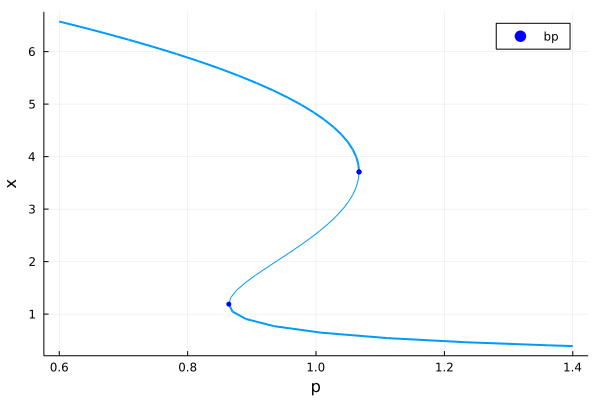

In [52]:
F=(x,p) -> @. logoutbreak(x,(p,),0)
opts = ContinuationPar(pMin=0.6,pMax=1.4, detectBifurcation=3)
br1, = continuation(F,[6.5],[0.5,8.0,0.6],(@lens _[3]), opts)
plot(br1)

Los tres puntos fijos (dos atractores y un repulsor) salen de resolver la siguiente ecuacion (se puede obtener a partir de igualar a cero la ecuacion diferencial)

$x^3-Kx^2+x(1+KP/R)-K=0$

Que se puede resolver numericamente pasando los coeficientes del polinomio, para un valor dado de K y R obtenemos las tres raices del polinomio. Si obtenemos tres raices reales esos son los tres puntos fijos

Si en cambio alguna de las raices es compleja con parte imaginaria diferente de cero entonces no corresponde a un punto fijo. En este caso tenemos un solo punto fijo

In [44]:
K = 8.0; R=0.5
@manipulate throttle=.1 for P=0.6:0.005:1.2
    pr = filter(isreal,roots(Polynomial([-K,1.0+K*P/R,-K,1.0])))
    plot(br1)
    scatter!(repeat([P],length(pr)),real(pr),label="PF")
end 

Node{WebIO.DOM}(WebIO.DOM(:html, :div), Any[Node{WebIO.DOM}(WebIO.DOM(:html, :div), Any[Scope(Node{WebIO.DOM}(WebIO.DOM(:html, :div), Any[Node{WebIO.DOM}(WebIO.DOM(:html, :div), Any[Node{WebIO.DOM}(WebIO.DOM(:html, :label), Any["P"], Dict{Symbol, Any}(:className => "interact ", :style => Dict{Any, Any}(:padding => "5px 10px 0px 10px")))], Dict{Symbol, Any}(:className => "interact-flex-row-left")), Node{WebIO.DOM}(WebIO.DOM(:html, :div), Any[Node{WebIO.DOM}(WebIO.DOM(:html, :input), Any[], Dict{Symbol, Any}(:max => 121, :min => 1, :attributes => Dict{Any, Any}(:type => "range", Symbol("data-bind") => "numericValue: index, valueUpdate: 'input', event: {change: function (){this.changes(this.changes()+1)}}", "orient" => "horizontal"), :step => 1, :className => "slider slider is-fullwidth", :style => Dict{Any, Any}()))], Dict{Symbol, Any}(:className => "interact-flex-row-center")), Node{WebIO.DOM}(WebIO.DOM(:html, :div), Any[Node{WebIO.DOM}(WebIO.DOM(:html, :p), Any[], Dict{Symbol, Any}(:attributes => Dict("data-bind" => "text: formatted_val")))], Dict{Symbol, Any}(:className => "interact-flex-row-right"))], Dict{Symbol, Any}(:className => "interact-flex-row interact-widget")), Dict{String, Tuple{Observables.AbstractObservable, Union{Nothing, Bool}}}("changes" => (Observable{Int64} with 1 listeners. Value:
0, nothing), "index" => (Observable{Any} with 2 listeners. Value:
61, nothing)), Set{String}(), nothing, Asset[Asset("js", "knockout", "C:\\Users\\Camilo\\.julia\\packages\\Knockout\\3gjS1\\src\\..\\assets\\knockout.js"), Asset("js", "knockout_punches", "C:\\Users\\Camilo\\.julia\\packages\\Knockout\\3gjS1\\src\\..\\assets\\knockout_punches.js"), Asset("js", nothing, "C:\\Users\\Camilo\\.julia\\packages\\InteractBase\\o1I6G\\src\\..\\assets\\all.js"), Asset("css", nothing, "C:\\Users\\Camilo\\.julia\\packages\\InteractBase\\o1I6G\\src\\..\\assets\\style.css"), Asset("css", nothing, "C:\\Users\\Camilo\\.julia\\packages\\Interact\\pVyN2\\src\\..\\assets\\bulma_confined.min.css")], Dict{Any, Any}("changes" => Any[WebIO.JSString("(function (val){return (val!=this.model[\"changes\"]()) ? (this.valueFromJulia[\"changes\"]=true, this.model[\"changes\"](val)) : undefined})")], "index" => Any[WebIO.JSString("(function (val){return (val!=this.model[\"index\"]()) ? (this.valueFromJulia[\"index\"]=true, this.model[\"index\"](val)) : undefined})")]), WebIO.ConnectionPool(Channel{Any}(32), Set{AbstractConnection}(), Condition(Base.InvasiveLinkedList{Task}(Task (runnable) @0x0000000079216270, Task (runnable) @0x0000000079216270), Base.AlwaysLockedST(1))), WebIO.JSString[WebIO.JSString("function () {\n    var handler = (function (ko, koPunches) {\n    ko.punches.enableAll();\n    ko.bindingHandlers.numericValue = {\n        init: function(element, valueAccessor, allBindings, data, context) {\n            var stringified = ko.observable(ko.unwrap(valueAccessor()));\n            stringified.subscribe(function(value) {\n                var val = parseFloat(value);\n                if (!isNaN(val)) {\n                    valueAccessor()(val);\n                }\n            });\n            valueAccessor().subscribe(function(value) {\n                var str = JSON.stringify(value);\n                if ((str == \"0\") && ([\"-0\", \"-0.\"].indexOf(stringified()) >= 0))\n                     return;\n                 if ([\"null\", \"\"].indexOf(str) >= 0)\n                     return;\n                stringified(str);\n            });\n            ko.applyBindingsToNode(\n                element,\n                {\n                    value: stringified,\n                    valueUpdate: allBindings.get('valueUpdate'),\n                },\n                context,\n            );\n        }\n    };\n    var json_data = {\"formatted_vals\":[\"0.6\",\"0.605\",\"0.61\",\"0.615\",\"0.62\",\"0.625\",\"0.63\",\"0.635\",\"0.64\",\"0.645\",\"0.65\",\"0.655\",\"0.66\",\"0.665\",\"0.67\",\"0.675\",\"0.68\",\"0.685\",\"0.69\",\"0.695\",\"0.7\",\"0.705\",\"0.

In [53]:
Vlogoutbreak(x,p) = p[1]*x*x/(3*p[2])*(x-3*p[2]/2)+p[3]*(x-atan(x))
R = 0.5; K=8.0
@manipulate throttle=.05 for P=0.8:0.001:1.2,xini=0:0.01:6.0, tmax=10:10:200
    x=0:0.01:6.0
    p1 = plot(x,Vlogoutbreak.(x,([R,K,P],)),size = (900,300))
    sol = solve(ODEProblem(logoutbreak, xini, (0,tmax), [R,K,P]))
    scatter!(p1,[xini],[Vlogoutbreak(xini,[R,K,P])],label="xini")
    plot!(p1,sol,Vlogoutbreak.(sol.u,([R,K,P],)),color=:black,linewidth=2)
end

Node{WebIO.DOM}(WebIO.DOM(:html, :div), Any[Node{WebIO.DOM}(WebIO.DOM(:html, :div), Any[Scope(Node{WebIO.DOM}(WebIO.DOM(:html, :div), Any[Node{WebIO.DOM}(WebIO.DOM(:html, :div), Any[Node{WebIO.DOM}(WebIO.DOM(:html, :label), Any["P"], Dict{Symbol, Any}(:className => "interact ", :style => Dict{Any, Any}(:padding => "5px 10px 0px 10px")))], Dict{Symbol, Any}(:className => "interact-flex-row-left")), Node{WebIO.DOM}(WebIO.DOM(:html, :div), Any[Node{WebIO.DOM}(WebIO.DOM(:html, :input), Any[], Dict{Symbol, Any}(:max => 401, :min => 1, :attributes => Dict{Any, Any}(:type => "range", Symbol("data-bind") => "numericValue: index, valueUpdate: 'input', event: {change: function (){this.changes(this.changes()+1)}}", "orient" => "horizontal"), :step => 1, :className => "slider slider is-fullwidth", :style => Dict{Any, Any}()))], Dict{Symbol, Any}(:className => "interact-flex-row-center")), Node{WebIO.DOM}(WebIO.DOM(:html, :div), Any[Node{WebIO.DOM}(WebIO.DOM(:html, :p), Any[], Dict{Symbol, Any}(:attributes => Dict("data-bind" => "text: formatted_val")))], Dict{Symbol, Any}(:className => "interact-flex-row-right"))], Dict{Symbol, Any}(:className => "interact-flex-row interact-widget")), Dict{String, Tuple{Observables.AbstractObservable, Union{Nothing, Bool}}}("changes" => (Observable{Int64} with 1 listeners. Value:
0, nothing), "index" => (Observable{Any} with 2 listeners. Value:
201, nothing)), Set{String}(), nothing, Asset[Asset("js", "knockout", "C:\\Users\\Camilo\\.julia\\packages\\Knockout\\3gjS1\\src\\..\\assets\\knockout.js"), Asset("js", "knockout_punches", "C:\\Users\\Camilo\\.julia\\packages\\Knockout\\3gjS1\\src\\..\\assets\\knockout_punches.js"), Asset("js", nothing, "C:\\Users\\Camilo\\.julia\\packages\\InteractBase\\o1I6G\\src\\..\\assets\\all.js"), Asset("css", nothing, "C:\\Users\\Camilo\\.julia\\packages\\InteractBase\\o1I6G\\src\\..\\assets\\style.css"), Asset("css", nothing, "C:\\Users\\Camilo\\.julia\\packages\\Interact\\pVyN2\\src\\..\\assets\\bulma_confined.min.css")], Dict{Any, Any}("changes" => Any[WebIO.JSString("(function (val){return (val!=this.model[\"changes\"]()) ? (this.valueFromJulia[\"changes\"]=true, this.model[\"changes\"](val)) : undefined})")], "index" => Any[WebIO.JSString("(function (val){return (val!=this.model[\"index\"]()) ? (this.valueFromJulia[\"index\"]=true, this.model[\"index\"](val)) : undefined})")]), WebIO.ConnectionPool(Channel{Any}(32), Set{AbstractConnection}(), Condition(Base.InvasiveLinkedList{Task}(Task (runnable) @0x00000000856d1780, Task (runnable) @0x00000000856d1780), Base.AlwaysLockedST(1))), WebIO.JSString[WebIO.JSString("function () {\n    var handler = (function (ko, koPunches) {\n    ko.punches.enableAll();\n    ko.bindingHandlers.numericValue = {\n        init: function(element, valueAccessor, allBindings, data, context) {\n            var stringified = ko.observable(ko.unwrap(valueAccessor()));\n            stringified.subscribe(function(value) {\n                var val = parseFloat(value);\n                if (!isNaN(val)) {\n                    valueAccessor()(val);\n                }\n            });\n            valueAccessor().subscribe(function(value) {\n                var str = JSON.stringify(value);\n                if ((str == \"0\") && ([\"-0\", \"-0.\"].indexOf(stringified()) >= 0))\n                     return;\n                 if ([\"null\", \"\"].indexOf(str) >= 0)\n                     return;\n                stringified(str);\n            });\n            ko.applyBindingsToNode(\n                element,\n                {\n                    value: stringified,\n                    valueUpdate: allBindings.get('valueUpdate'),\n                },\n                context,\n            );\n        }\n    };\n    var json_data = {\"formatted_vals\":[\"0.8\",\"0.801\",\"0.802\",\"0.803\",\"0.804\",\"0.805\",\"0.806\",\"0.807\",\"0.808\",\"0.809\",\"0.81\",\"0.811\",\"0.812\",\"0.813\",\"0.814\",\"0.815\",\"0.816\",\"0.817\",\"0.818\",\"0.819\",\"0.82\",\"0.